<a href="https://colab.research.google.com/github/warwavn/AIMLKMITL2024/blob/Day3/Day3/04_RAG_HR%20Problem/ex_1-text-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Use Case 1: Classification with Text Embeddings


### imports

In [1]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")

# Run the installation commands

!pip install openai
!pip install gradio
!pip install tiktoken

# Clean up the notebook
clean_notebook()

Notebook cleaned.


In [2]:

import openai
openai.api_key = "code"

In [ ]:
import openai
import tiktoken

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### import data

In [ ]:

# Corrected code to download the dataset
!wget -nc https://raw.githubusercontent.com/Tuchsanai/AIMaster-seagate-training-2024/main/Dataset/resumes/resumes_train.csv

!wget -nc https://raw.githubusercontent.com/Tuchsanai/AIMaster-seagate-training-2024/main/Dataset/resumes/resumes_test.csv

File ‘resumes_train.csv’ already there; not retrieving.

--2024-06-03 05:08:28--  https://raw.githubusercontent.com/Tuchsanai/AIMaster-seagate-training-2024/main/Dataset/resumes/resumes_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92603 (90K) [text/plain]
Saving to: ‘resumes_test.csv’

resumes_test.csv    100%[===================>]  90.43K  --.-KB/s    in 0.02s   

2024-06-03 05:08:29 (3.87 MB/s) - ‘resumes_test.csv’ saved [92603/92603]



In [ ]:
df_resume = pd.read_csv('./resumes_train.csv')
df_resume

resume  \
0   ### John Doe\n\n---\n\n#### Summary\nDetail-or...   
1   Creating a resume for a Data Scientist based o...   
2   Creating a resume for a Data Scientist...\n\n-...   
3   Creating a resume for a Data Scientist based o...   
4   ## John Doe\n\n---\n\n### Summary:\nData Scien...   
..                                                ...   
95  Sure, here is a randomly generated resume for ...   
96  ---\n**John Doe**\nSummary:\nDedicated and res...   
97  ---\n**Jane Doe**\n---\n\n**Summary:**\nDedica...   
98  Certainly! Here is a randomly generated resume...   
99  Certainly! Here is a randomly generated resume...   

                                                 role  
0                                      Data Scientist  
1                                      Data Scientist  
2                                      Data Scientist  
3                                      Data Scientist  
4                                      Data Scientist  
..                                                ...  
95  Generate a random resume, you decide the roles...  
96  Generate a random resume, you decide the roles...  
97  Generate a random resume, you decide the roles...  
98  Generate a random resume, you decide the roles...  
99  Generate a random resume, you decide the roles...  

[100 rows x 2 columns]

In [ ]:
encoding = tiktoken.encoding_for_model("gpt-3.5-turbo")

def update_total(text):
    ints = encoding.encode(text)
    num_token = len(ints)
    return num_token

df_resume['num_token']= df_resume['resume'].apply(update_total)

print("there are token = ", df_resume['num_token'].sum())

there are token =  35028


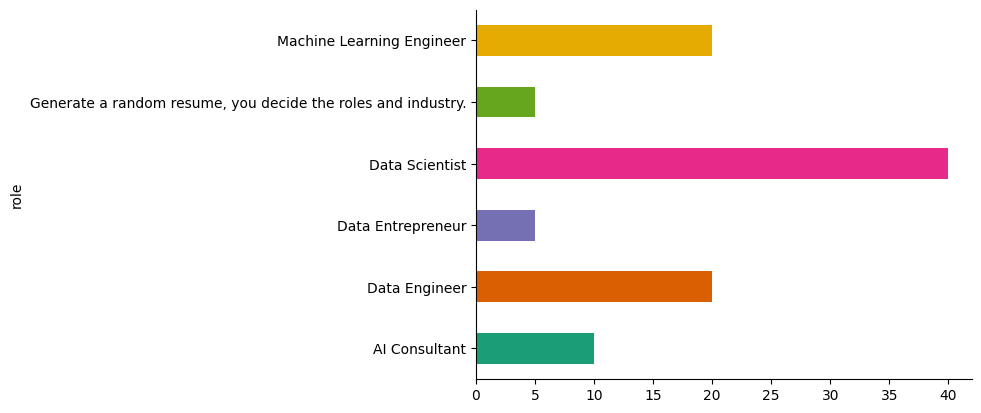

In [ ]:
# @title role

from matplotlib import pyplot as plt
import seaborn as sns
df_resume.groupby('role').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_resume['role'].value_counts()

role
Data Scientist                                                  40
Data Engineer                                                   20
Machine Learning Engineer                                       20
AI Consultant                                                   10
Data Entrepreneur                                                5
Generate a random resume, you decide the roles and industry.     5
Name: count, dtype: int64

### generate text embeddings

In [ ]:
from IPython.display import Markdown, display

idx = 3
display(Markdown("role = "+df_resume.loc[idx, "role"]))
display(Markdown("===================================="))
display(Markdown(df_resume.loc[idx, "resume"]))




role = Data Scientist

====================================

Creating a resume for a Data Scientist based on the given information...

---

**John Doe**

---

**Summary:**
Detail-oriented Data Scientist with a strong background in statistical analysis, machine learning, and data visualization. Experienced in deriving actionable insights from complex datasets to drive business decisions. Proficient in programming languages such as Python, R, and SQL.

---

**Professional Experience:**

**Data Scientist**  
ABC Company  
January 2018 - Present  
- Applied machine learning algorithms to analyze and interpret large datasets, leading to a 20% increase in revenue  
- Developed predictive models for customer segmentation, enhancing targeted marketing strategies  
- Collaborated with cross-functional teams to optimize data collection processes and improve data quality  

**Data Analyst**  
XYZ Corporation  
June 2015 - December 2017  
- Conducted in-depth statistical analysis to identify trends and patterns in customer behavior  
- Created interactive data visualizations to communicate complex findings to stakeholders  
- Implemented data cleaning and preprocessing techniques to ensure data accuracy and integrity  

---

**Education:**

**Master of Science in Data Science**  
University of Applied Sciences  
Graduated: May 2015  

**Bachelor of Science in Statistics**  
State University  
Graduated: May 2013  

---

**Technical Skills:**
- Programming Languages: Python, R, SQL  
- Data Visualization: Tableau, matplotlib, ggplot2  
- Machine Learning: Scikit-learn, TensorFlow, Keras  
- Database Management: MySQL, MongoDB  
- Statistical Analysis: Hypothesis testing, Regression analysis, Time series analysis  

---

**Certifications:**
- Certified Data Scientist (CDS)  
- Machine Learning Certification from Coursera  

---

**Awards and Honors:**
- Dean's List for academic excellence  
- Outstanding Performance Award for contributions to data analytics projects  

---

This resume is a fictional representation created by ResumeGenerator. It showcases the typical profile of a Data Scientist with expertise in statistical analysis, machine learning, and data visualization.

In [ ]:

idx = 7
display(Markdown("role = "+df_resume.loc[idx, "role"]))
display(Markdown("===================================="))
display(Markdown(df_resume.loc[idx, "resume"]))

role = Data Scientist

====================================

Generating a resume for a Data Scientist...

---

**John Doe**

---

**Summary:**

Highly skilled and experienced Data Scientist with a strong background in analyzing complex data sets to drive meaningful insights and decision-making. Proficient in machine learning algorithms, data visualization techniques, and statistical modeling. Adept at developing predictive models and optimizing data processing workflows to enhance business operations.

---

**Professional Experience:**

**Data Scientist**  
XYZ Tech Company, Anytown, USA  
January 2018 - Present
- Conduct data analysis to identify trends, patterns, and correlations in large datasets
- Develop predictive models using machine learning algorithms to optimize business processes
- Collaborate with cross-functional teams to interpret data and provide actionable insights
- Communicate findings to non-technical stakeholders through data visualization tools

**Data Analyst Intern**  
ABC Solutions, Anytown, USA  
June 2017 - December 2017
- Assisted in cleaning and preparing data for analysis
- Conducted statistical analysis to support decision-making processes
- Developed automated reports and dashboards to track key performance indicators

---

**Education:**

**Master of Science in Data Science**  
University of Data Science, Anytown, USA  
Graduated: May 2017

**Bachelor of Science in Statistics**  
Anytown University, Anytown, USA  
Graduated: May 2015

---

**Technical Skills:**

- Python
- R
- SQL
- Machine Learning
- Data Visualization (Tableau, Power BI)
- Statistical Modeling

---

**Certifications:**

- Certified Data Scientist (CDS)
- AWS Certified Big Data - Specialty

---

**Awards and Honors:**

- Dean's List, University of Data Science
- Outstanding Data Analysis Project, Anytown University

---

This resume is a fictional representation created by ResumeGenerator.

In [ ]:
def generate_embeddings(text):
    # set credentials


    # make api call
    response =  openai.embeddings.create(
        input=text,
        model="text-embedding-3-small"
    )

    # return text embedding
    return response.data

In [ ]:
# generate embeddings
text_embeddings = generate_embeddings(df_resume['resume'])
# extract embeddings
text_embedding_list = [text_embeddings[i].embedding for i in range(len(text_embeddings))]

In [ ]:
text_embedding_list

[[0.011933398433029652,
  0.010846859775483608,
  0.04410356655716896,
  0.02306424081325531,
  0.03449758514761925,
  0.0001288720523007214,
  -0.020570140331983566,
  0.03484329953789711,
  -0.023768020793795586,
  -0.0005560019053518772,
  0.0331147164106369,
  -0.03674474358558655,
  -0.049733810126781464,
  0.017075933516025543,
  0.05699386075139046,
  0.09897374361753464,
  -0.039411697536706924,
  0.012044521048665047,
  -0.022656789049506187,
  0.06761229783296585,
  0.011803754605352879,
  0.026249771937727928,
  0.04719032347202301,
  -0.019952790811657906,
  0.017100628465414047,
  -0.021730761975049973,
  0.02485455758869648,
  0.03637433052062988,
  0.01980462484061718,
  -0.004080691374838352,
  0.03657188266515732,
  -0.009871445596218109,
  -0.04459745064377785,
  -0.013655807822942734,
  0.018582269549369812,
  -0.01660674624145031,
  0.013557031750679016,
  0.026521407067775726,
  0.018335329368710518,
  -0.011612375266849995,
  0.007611940149217844,
  -0.04491847008

### Store embeddings in df

In [ ]:
# define df column names
column_names = ["embedding_" + str(i) for i in range(len(text_embedding_list[0]))]

# store text embeddings in dataframe
df_train = pd.DataFrame(text_embedding_list, columns=column_names)

# create target variable
df_train['is_data_scientist'] = df_resume['role']=="Data Scientist"
df_train.to_csv('embeddings_train.csv', index=False)
df_train.head()

embedding_0  embedding_1  embedding_2  embedding_3  embedding_4  \
0     0.011933     0.010847     0.044104     0.023064     0.034498   
1     0.005887     0.030654     0.032117    -0.006901     0.008575   
2     0.008211     0.016624     0.029623     0.011863     0.014980   
3     0.000980     0.022212     0.049778     0.009431     0.015012   
4     0.019266     0.003695     0.035332     0.021370     0.037020   

   embedding_5  embedding_6  embedding_7  embedding_8  embedding_9  ...  \
0     0.000129    -0.020570     0.034843    -0.023768    -0.000556  ...   
1    -0.034895    -0.015005     0.053421    -0.018737     0.012431  ...   
2    -0.028498    -0.011717     0.048397    -0.035791     0.019032  ...   
3    -0.034424    -0.012995     0.058286    -0.031759     0.034229  ...   
4    -0.022668    -0.023764     0.061641    -0.019442    -0.005267  ...   

   embedding_1527  embedding_1528  embedding_1529  embedding_1530  \
0        0.043363       -0.029806        0.016483        0.001631   
1        0.020039       -0.010435        0.012983       -0.008693   
2        0.019437        0.000441        0.018672        0.001213   
3        0.020476       -0.012872        0.025500       -0.002258   
4        0.023764       -0.006754        0.031400        0.008064   

   embedding_1531  embedding_1532  embedding_1533  embedding_1534  \
0        0.017533        0.010816       -0.037288        0.011057   
1       -0.003131        0.004374       -0.025161        0.033382   
2       -0.001257        0.004882       -0.022735        0.022960   
3        0.012567        0.000316       -0.032371        0.030463   
4        0.017729        0.024810       -0.041002        0.031274   

   embedding_1535  is_data_scientist  
0        0.001679               True  
1        0.003277               True  
2        0.004629               True  
3        0.008802               True  
4        0.000356               True  

[5 rows x 1537 columns]

### Visualize embeddings with PCA

In [ ]:
# split variables by predictors and target
X = df_train.iloc[:,:-1]
y = df_train.iloc[:,-1]

# apply PCA to predictors (i.e. embeddings)
pca = PCA(n_components=2).fit(X)
print(pca.explained_variance_ratio_)

[0.13940346 0.11353306]


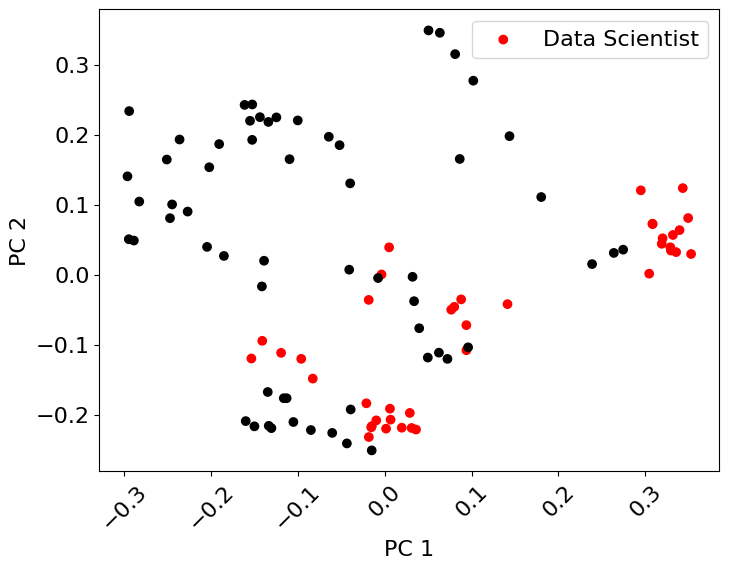

In [ ]:
# plot data along PCA components
c_arr = np.array(["k"] * len(y))
c_arr[y] = "r"

plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 16})
plt.scatter(pca.transform(X)[:,0], pca.transform(X)[:,1], c=c_arr)
plt.legend(["Data Scientist"])
plt.xticks(rotation = 45)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

### Train Random Forest Model

In [ ]:
# train rf model
clf = RandomForestClassifier(max_depth=2, random_state=0).fit(X, y)
clf.score(X,y) # model accuracy for training data

1.0

In [ ]:
# AUC value for training data
auc_val = roc_auc_score(y, clf.predict_proba(X)[:,1])
auc_val

1.0

In [ ]:
# print feature importance ranking
feature_importances = pd.Series(clf.feature_importances_, index=column_names)
feature_importances_sorted = feature_importances.sort_values(ascending=False)
print(feature_importances_sorted[:25])

embedding_786     0.039140
embedding_500     0.034219
embedding_464     0.030234
embedding_1135    0.025598
embedding_72      0.025091
embedding_914     0.023709
embedding_792     0.021633
embedding_291     0.021493
embedding_1129    0.019163
embedding_725     0.019160
embedding_526     0.018982
embedding_863     0.018442
embedding_181     0.017756
embedding_294     0.016686
embedding_1020    0.014972
embedding_639     0.014808
embedding_630     0.014567
embedding_1357    0.014073
embedding_162     0.013674
embedding_129     0.013136
embedding_99      0.012933
embedding_1199    0.012847
embedding_229     0.012758
embedding_571     0.012176
embedding_173     0.011248
dtype: float64


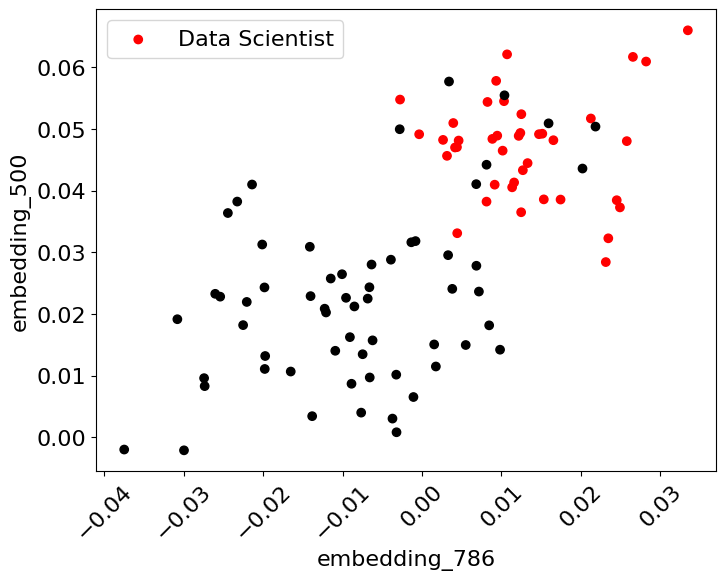

In [ ]:
# plot data along top 2 most important features
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 16})
plt.scatter(X[feature_importances_sorted.index[0]], X[feature_importances_sorted.index[1]], c=c_arr)
plt.legend(["Data Scientist"])
plt.xticks(rotation = 45)
plt.xlabel(feature_importances_sorted.index[0])
plt.ylabel(feature_importances_sorted.index[1])
plt.show()

#### evaluate model on testing data

In [ ]:
# import testing data
df_resume = pd.read_csv('resumes_test.csv')

# generate embeddings
text_embedding_list = generate_embeddings(df_resume['resume'])
text_embedding_list = [text_embedding_list[i].embedding for i in range(len(text_embedding_list))]

# store text embeddings in dataframe
df_test = pd.DataFrame(text_embedding_list, columns=column_names)

# create target variable
df_test['is_data_scientist'] = df_resume['role']=="Data Scientist"
df_test.to_csv('embeddings_test.csv', index=False)
df_test.head()

# define predictors and target
X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]

In [ ]:
df_resume

resume  \
0   Creating a resume for a Data Scientist based o...   
1   I. **Name:** John Smith\n\nII. **Summary:**\nA...   
2   Creating a resume for a Data Scientist based o...   
3   **Name:** \nJohn Smith\n\n**Summary:**\nHighly...   
4   **Name:** John Smith\n\n**Summary:**\nDedicate...   
5   **John Doe**\n\n---\n\n**Summary:**\nDynamic a...   
6   Creating a resume for a Data Scientist based o...   
7   Creating a resume for a Data Scientist...\n\n-...   
8   Creating a resume for a Data Scientist based o...   
9   # John Doe\n\n## Summary:\nDynamic and results...   
10  # John Doe\n\n## Summary\nDynamic and results-...   
11  Creating a resume for a Data Scientist based o...   
12  ### Name:\nJohn Doe\n\n### Summary:\nDedicated...   
13  **Name:** John Smith\n\n**Summary:**\nExperien...   
14  # John Doe\n\n## Summary\nA highly skilled and...   
15  Creating a resume for a Data Scientist based o...   
16  **Name**: John Smith \n\n---\n\n**Summary**:\n...   
17  **John Smith**\n\n---\n\n**Summary:**\nDynamic...   
18  Creating a resume for a Data Scientist.\n\n---...   
19  **Name:** John Smith\n\n**Summary:**\nDetail-o...   
20  Creating a resume for a Data Engineer. \n\n**J...   
21  **Name:** Emily Johnson\n\n**Summary:** Dedica...   
22  Creating a resume for a Data Engineer based on...   
23  **Name:** John Smith\n\n**Summary:** \nDedicat...   
24  **Name:** John Smith\n\n**Summary:** \nDedicat...   
25  Please find below a sample resume for a Data E...   
26  # John Doe\n\n## Summary\nExperienced and deta...   
27  ### John Doe\n\n---\n\n**Summary:**\nDetail-or...   
28  Here is a sample resume for a Data Engineer:\n...   
29  **Name:** John Smith  \n**Summary:** Experienc...   
30  Here is the generated fake resume for a Machin...   
31  # John Doe\n\n## Summary\nDedicated Machine Le...   
32  **John Doe**\nMachine Learning Engineer\n\n**S...   
33  **Name:** John Doe\n\n**Summary:** \nExperienc...   
34  Generating a resume for a Machine Learning Eng...   
35  **Name**: John Smith\n\n---\n\n**Summary:**\nE...   
36  **John Doe**\nEmail: johndoe@email.com\nPhone:...   
37  **Name:** John Smith\n\n**Summary:**\nDetail-o...   
38  **Name:**  \nAlex Johnson  \n\n**Summary:**  \...   
39  **John Smith**\n\n---\n\n**Summary:**\nDedicat...   
40  **Name:** John Smith\n\n---\n\n**Summary:**\nR...   
41  **Name:** Alex Johnson\n\n---\n\n**Summary:**\...   
42  # John Doe\n\n## Summary\nDynamic AI Consultan...   
43  **Name:** Emily Johnson\n\n---\n\n**Summary:**...   
44  # John Doe\n## Summary\nDynamic and results-dr...   
45  Name: Jessica Reynolds\n\n---\n\n**Summary:**\...   
46  ## Name\nJohn Smith\n\n## Summary\nDynamic and...   
47  **Resume**\n\n---\n\n**Name:** [Your Name]\n\n...   
48  Certainly! Here is a randomly generated resume...   
49  Certainly! Here is a randomly generated resume...   

                                                 role  
0                                      Data Scientist  
1                                      Data Scientist  
2                                      Data Scientist  
3                                      Data Scientist  
4                                      Data Scientist  
5                                      Data Scientist  
6                                      Data Scientist  
7                                      Data Scientist  
8                                      Data Scientist  
9                                      Data Scientist  
10                                     Data Scientist  
11                                     Data Scientist  
12                                     Data Scientist  
13                                     Data Scientist  
14                                     Data Scientist  
15                                     Data Scientist  
16                                     Data Scientist  
17                                     Data Scientist  
18                                     Data Scientist  
19                 

In [ ]:

idx = 7
display(Markdown("role = "+df_resume.loc[idx, "role"]))
display(Markdown("===================================="))
display(Markdown(df_resume.loc[idx, "resume"]))

role = Data Scientist

====================================

Creating a resume for a Data Scientist...

---

**John Doe**
Data Scientist

**Summary:**
Dynamic and results-driven Data Scientist with a strong background in statistical analysis, machine learning, and data visualization. Skilled in developing and implementing innovative solutions to complex data-related problems. Proven track record of leveraging data to drive business decisions and enhance operational efficiency.

**Professional Experience:**
1. Senior Data Scientist
   ABC Analytics, Anytown
   - Spearheaded projects to optimize predictive modeling algorithms, resulting in a 20% increase in forecast accuracy.
   - Collaborated with cross-functional teams to develop data-driven strategies for market segmentation and customer profiling.

2. Data Analyst Intern
   XYZ Corporation, Sometown
   - Conducted in-depth data analysis to identify trends and insights, contributing to a 15% improvement in marketing campaign ROI.
   - Assisted in the development of data visualization dashboards using Tableau for improved data interpretation.

**Education:**
- Master of Science in Data Science
  University of Data Science, Citytown
- Bachelor of Science in Statistics
  State University, Hometown

**Technical Skills:**
- Programming Languages: Python, R, SQL
- Machine Learning: Regression, Classification, Clustering
- Tools: TensorFlow, Tableau, Pandas, NumPy
- Data Visualization: Matplotlib, Seaborn
- Big Data Technologies: Hadoop, Spark

**Certifications:**
- Certified Data Scientist (CDS)
- Machine Learning Specialist (MLS)

**Awards and Honors:**
- Excellence in Data Analysis Award, ABC Analytics
- Dean's List, University of Data Science

---

This resume is a fictional representation created by ResumeGenerator.

In [ ]:
# accuracy
clf.score(X_test,y_test)

0.98

In [ ]:
# auc
auc_val = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
auc_val

0.9983333333333333

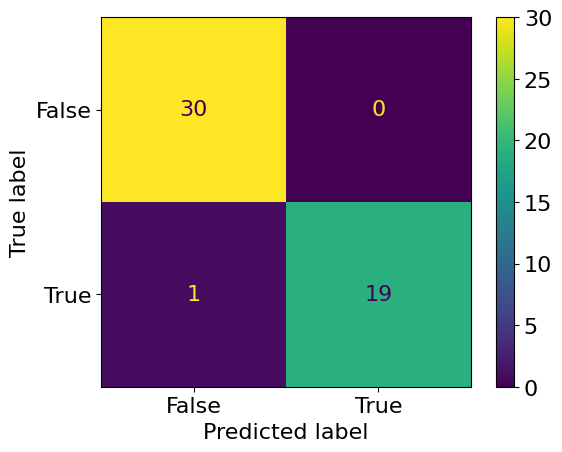

In [ ]:
cm = confusion_matrix(y_test, clf.predict(X_test), labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

In [ ]:
# look at errors
df_errors = df_resume[y_test != clf.predict(X_test)]
print(df_errors.iloc[0,0])

I. **Name:** John Smith

II. **Summary:**
A highly skilled Data Scientist with a strong background in statistical analysis and machine learning. Experienced in interpreting and analyzing complex data sets to drive business decisions and strategies. Proven ability to develop predictive models and algorithms to solve challenging problems.

III. **Professional Experience:**
1. *Data Scientist* at Tech Innovations Inc., San Francisco, CA
   - Developed machine learning models to optimize marketing strategies, resulting in a 15% increase in conversions.
   - Conducted in-depth data analysis to identify trends and insights for product development.

2. *Senior Data Analyst* at Data Solutions Co., New York, NY
   - Led a team to automate data collection processes, saving over 100 man-hours per month.
   - Collaborated with cross-functional teams to provide data-driven solutions for various business challenges.

IV. **Education:**
- *Master of Science in Data Science*, University of California,